In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils  # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten  # 컨볼루션 작업 시 필요
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_test = X_test.reshape(10000, width*height).astype('float32') / 255.0
Y_test = utils.to_categorical(y_test)  # 원핫인코딩
print('학습 후 테스트 데이터 shape : ', X_test.shape, Y_test.shape)

학습 후 테스트 데이터 shape :  (10000, 784) (10000, 10)


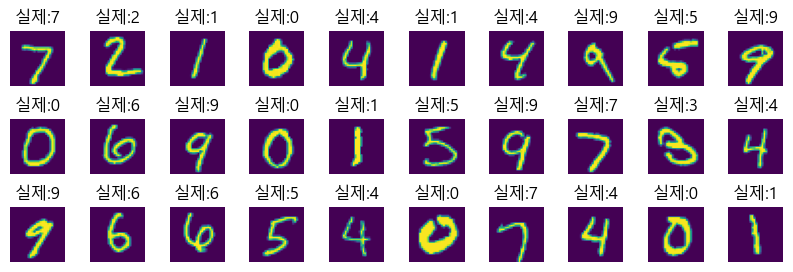

In [3]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 3   # 3행  세로 
plt_col = 10  # 10열 가로
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
# plt.rc('font', family='NanumBarunGothic')  # 코랩 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백
for i in range(plt_row * plt_col):
    # X_test[i]를 axarr[0, i]에 출력(imshow). Y_test[i].argmax()의 실제값을 title에 출력
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    # sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('실제:' + str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

Epoch 1/300
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2406 - accuracy: 0.9298 - val_loss: 0.1319 - val_accuracy: 0.9639
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0968 - accuracy: 0.9704 - val_loss: 0.0846 - val_accuracy: 0.9760
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0823 - val_accuracy: 0.9768
Epoch 4/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0477 - accuracy: 0.9845 - val_loss: 0.0860 - val_accuracy: 0.9753
Epoch 5/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0808 - val_accuracy: 0.9781
Epoch 6/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0902 - val_accuracy: 0.9772
Epoch 7/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.1044 - val_ac

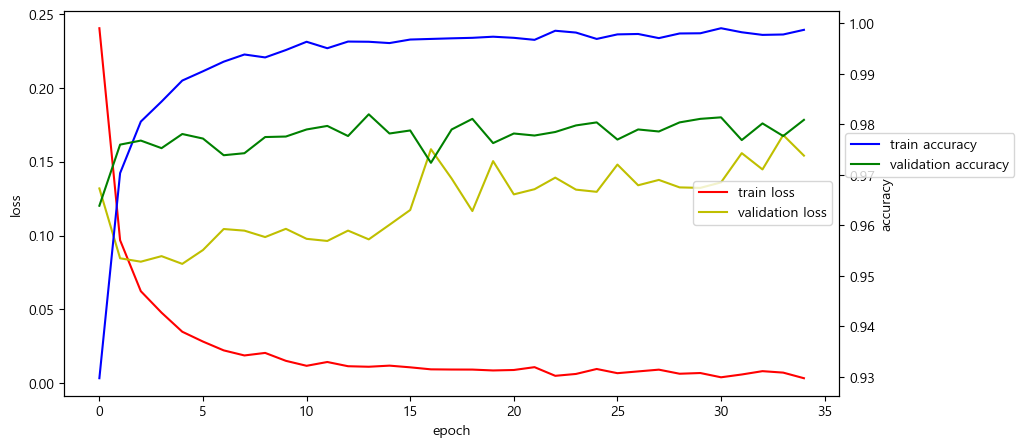

In [4]:
# 1. 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_train = X_train.reshape(60000, width*height).astype('float32') / 255.0
X_test = X_test.reshape(10000, width*height).astype('float32') / 255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
# print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(width*height, )))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))

# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train, epochs=300, batch_size=50, validation_data=(X_val, Y_val), callbacks=[early_stop])

# 5. 학습과정 살펴보기 (validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [5]:
# 모델 평가하기
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9802


(0.16145288944244385, 0.9801999926567078)

In [6]:
# 성능평가지표 = 교차표
y_hat = model.predict(X_test).argmax(axis=1)  # 예측치
print('예측치 : ', y_hat)
print('실제값 : ', np.argmax(Y_test, axis=1))
print('실제값 : ', y_test)
pd.crosstab(y_test, y_hat)

313/313 [==============================] - 1s 1ms/step
예측치 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,0,1,0,0,2,1,1,1
1,0,1129,1,2,0,0,1,0,2,0
2,4,2,998,6,0,1,1,10,9,1
3,0,0,2,996,0,3,0,4,3,2
4,2,0,4,1,963,0,3,4,0,5
5,2,0,0,9,0,869,6,3,2,1
6,2,3,0,0,5,1,945,0,2,0
7,0,4,6,2,1,0,0,1009,3,3
8,0,0,4,5,1,5,2,4,949,4


In [7]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_hat)
cmatrix  # 2차원

array([[ 973,    1,    0,    1,    0,    0,    2,    1,    1,    1],
       [   0, 1129,    1,    2,    0,    0,    1,    0,    2,    0],
       [   4,    2,  998,    6,    0,    1,    1,   10,    9,    1],
       [   0,    0,    2,  996,    0,    3,    0,    4,    3,    2],
       [   2,    0,    4,    1,  963,    0,    3,    4,    0,    5],
       [   2,    0,    0,    9,    0,  869,    6,    3,    2,    1],
       [   2,    3,    0,    0,    5,    1,  945,    0,    2,    0],
       [   0,    4,    6,    2,    1,    0,    0, 1009,    3,    3],
       [   0,    0,    4,    5,    1,    5,    2,    4,  949,    4],
       [   0,    2,    0,   10,   12,    7,    0,    5,    2,  971]],
      dtype=int64)

In [8]:
cnt = 0  # 실제값과 예측값이 다른 갯수
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        # print(i, j, data, end='\t')
        if i != j:  # 0행0열, 1행1열, ... 제외
            cnt += data
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  198


In [9]:
# y_hat   # 예측치
# y_test  # 실제값
cnt = 0
for y, h in zip(y_test, y_hat):
    if y != h:
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  198


i =  10000
cnt =  198


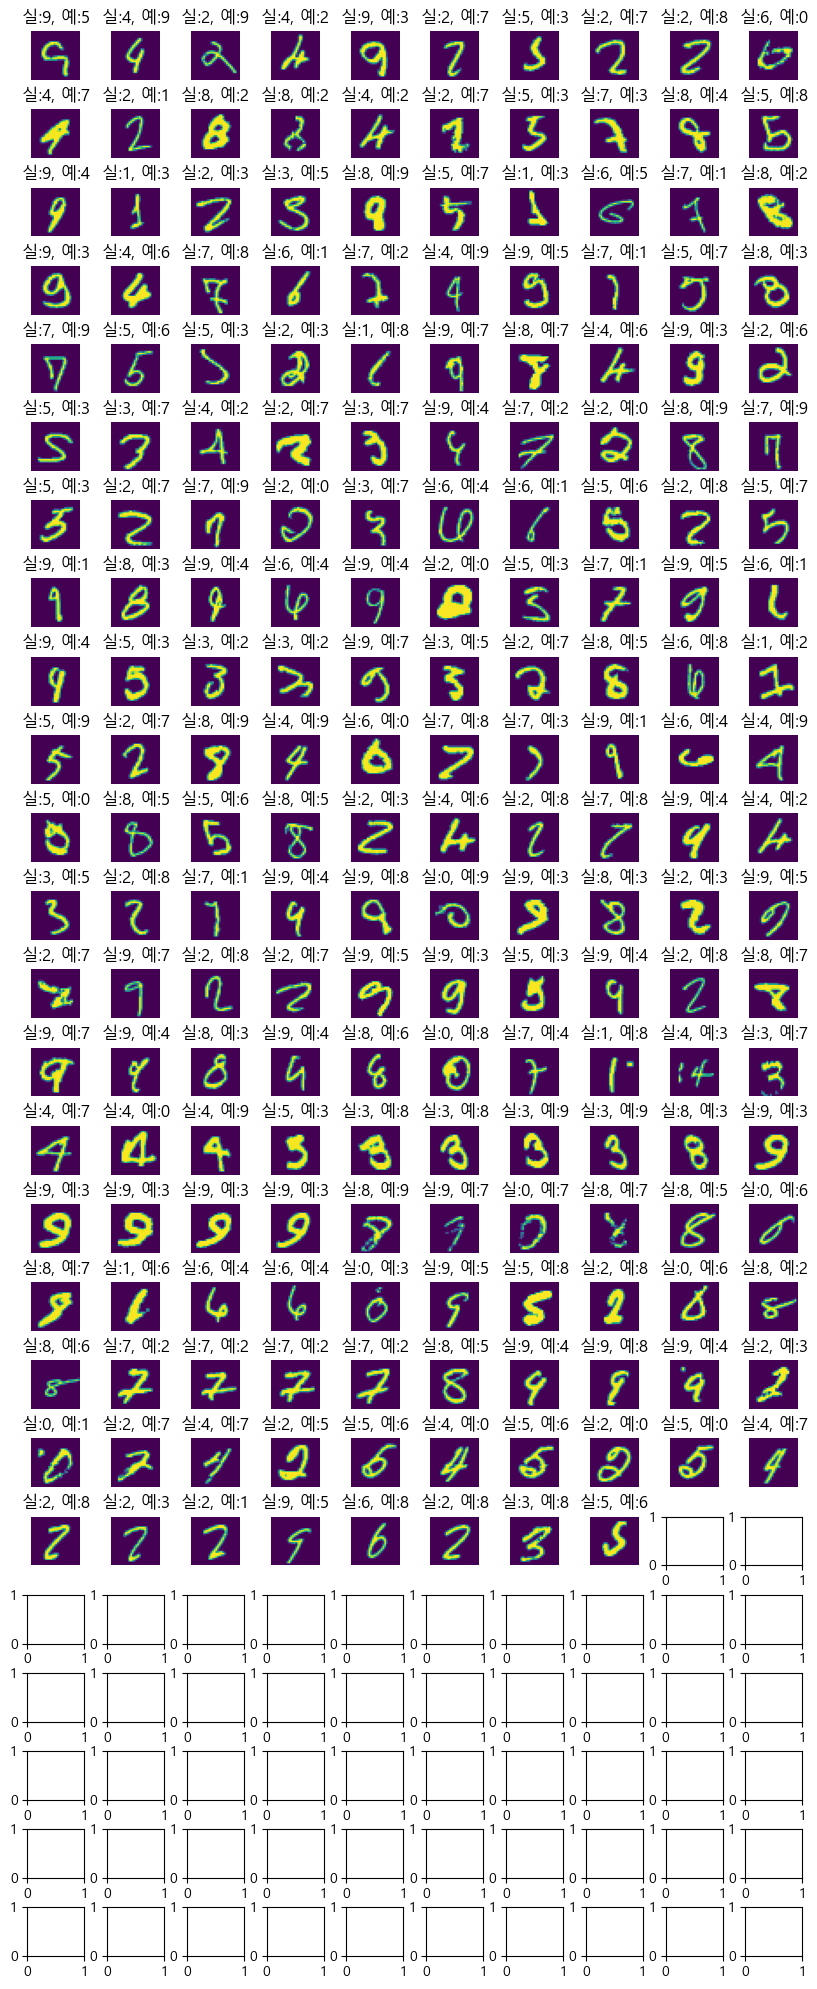

In [10]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 25  # 10행 세로 
plt_col = 10  # 10열 가로
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백

i = 0    # y_hat과 y_test를 액세스할 index
cnt = 0  # 출력할 횟수
while (cnt < plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if y_hat[i] == y_test[i]:  # 실제값 == 예측치일 경우
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt // plt_col, cnt % plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))  # 예측이 틀린 그림
    title = '실:{}, 예:{}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)

# CNN
 - 컨볼루션 레이어 -> max pooling -> DNN (딥러닝 교안 p.35)
 
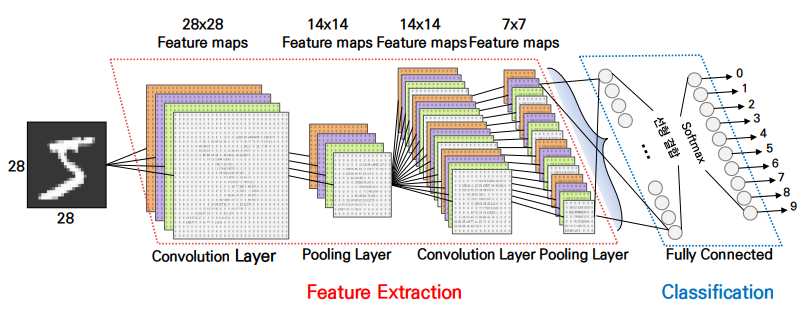

In [11]:
# 1. 데이터셋
width = 28
height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# y_test  # 원핫인코딩 전
X_train = X_train.reshape(60000, width, height, 1).astype('float32') / 255.0
X_test = X_test.reshape(10000, width, height, 1).astype('float32') / 255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델 생성
# Conv(3*3 사이즈 커널 32개) 28*28 => 26*26*32(28-3(커널사이즈)+1 = 26)
# MaxPooling (2*2 사이즈) 13*13*32
# Dropout()
# Conv(3*3 사이즈 커널 64개) 11*11*32*64(13(원사이즈)-3(커널사이즈)+1 = 11)
# MaxPooling (2*2 사이즈) 6*6*32*64
# 1차원 데이터로 만들기
# DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32,  # 커널 갯수
                 3,   # 커널 사이즈
                 padding='same',  # 바깥여백이 같도록 입력층과 출력층의 갯수를 같게(외곽에 의미 없는 값으로 메꿔 줌)
                 activation='relu',
                 input_shape=(width, height, 1),  # 1 : 3차원이 되도록
                ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) # 모든차원이 1차원으로 변환
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

(50000, 28, 28, 1) (50000, 10) (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                           

In [12]:
# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습시키기
earltystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_val, Y_val),
                callbacks=[earltystop])

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2424 - accuracy: 0.9247 - val_loss: 0.0552 - val_accuracy: 0.9845
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0952 - accuracy: 0.9714 - val_loss: 0.0524 - val_accuracy: 0.9845
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0387 - val_accuracy: 0.9884
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0316 - val_accuracy: 0.9923
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0322 - val_accuracy

In [13]:
model.save('model/mnist_cnn.h5')

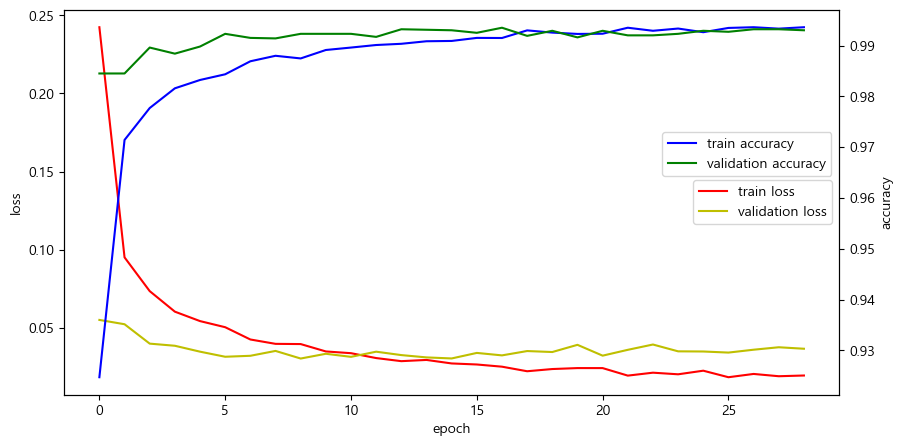

In [14]:
# 5. 모델 평가하기
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [15]:
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9930


(0.03675161302089691, 0.9929999709129333)

In [16]:
# 예측치와 실제값을 이용해서 교차표
yhat = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 1s 2ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,979,0,0,0,0,0,0,0,0,1
1,0,1133,1,0,0,0,0,0,1,0
2,1,0,1027,0,0,0,0,3,1,0
3,0,0,1,1002,0,5,0,1,1,0
4,0,0,0,0,979,0,1,0,1,1
5,1,0,0,3,0,886,1,1,0,0
6,2,1,0,0,1,2,951,0,1,0
7,0,2,4,0,0,0,0,1017,1,4
8,1,0,2,0,0,1,0,0,968,2


In [17]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt +=1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 62


i =  10000
cnt =  198


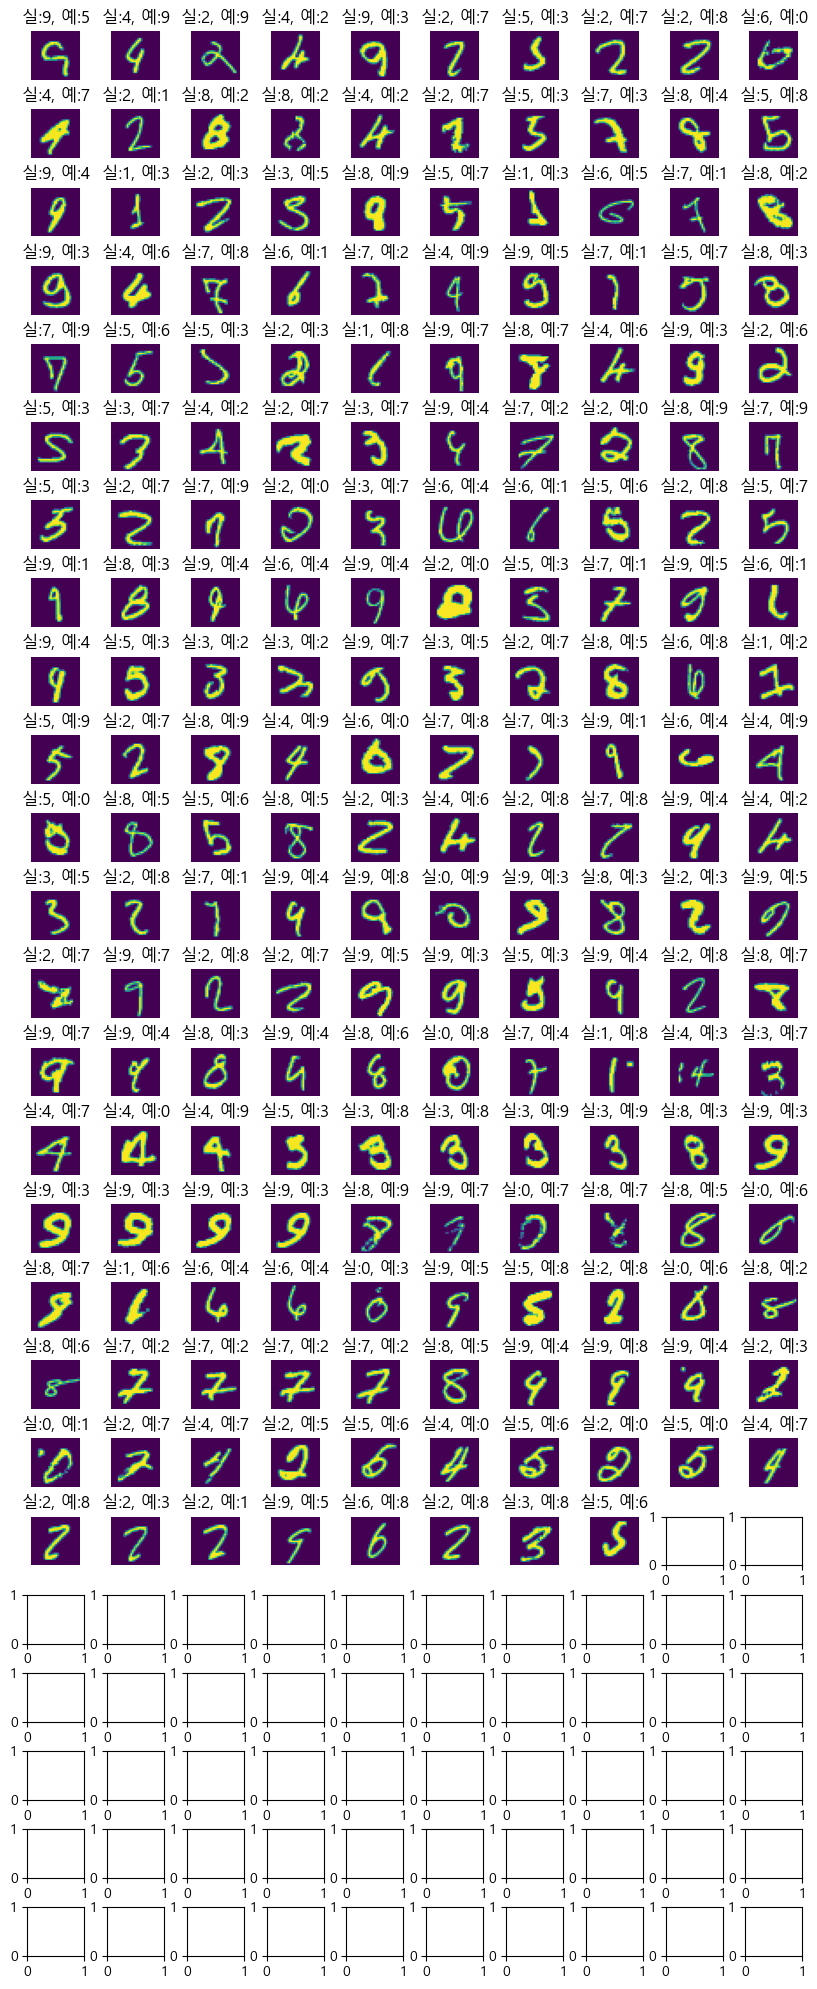

In [18]:
# 모델 학습 후 틀린 경우만 출력
plt_row = 8  # 10행 세로 
plt_col = 10  # 10열 가로
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # 상하여백, 좌우여백

i = 0    # y_hat과 y_test를 액세스할 index
cnt = 0  # 출력할 횟수
while (cnt < plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if y_hat[i] == y_test[i]:  # 실제값 == 예측치일 경우
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt // plt_col, cnt % plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))  # 예측이 틀린 그림
    title = '실:{}, 예:{}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)